In [774]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from queue import deque

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [775]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [776]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [777]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [778]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

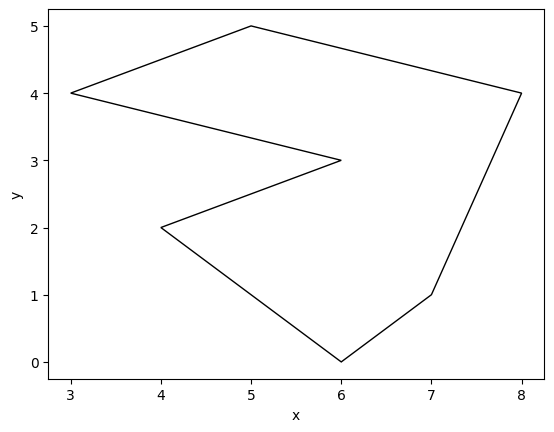

In [779]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [780]:
polygon = [(0,1),(2,2),(5,3),(3,7),(1,5),(2,3)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [781]:
def make_right_chain(min_i, max_i, polygon):
        n = len(polygon)
        res = []
        cur = min_i
        while True:
            res.append((polygon[cur][0], polygon[cur][1], cur))
            if cur == max_i:
                break
            cur = (cur + 1) % n
        return res

def make_left_chain(min_i, max_i, polygon):
        n = len(polygon)
        res = []
        cur = min_i
        while True:
            res.append((polygon[cur][0], polygon[cur][1], cur))
            if cur == max_i:
                break
            cur = (cur - 1) % n
        return res

def chain_non_decreasing(chain):
        prev_y = chain[0][1]
        n = len(chain)
        for i in range(1, n):
            y = chain[i][1]
            if y < prev_y:  
                return False
            prev_y = y
        return True

In [782]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    n = len(polygon)
    if n < 3:
        return False


    min_i = min(range(n), key=lambda i: (polygon[i][1], polygon[i][0]))
    max_i = max(range(n), key=lambda i: (polygon[i][1], polygon[i][0]))


    

    right_chain = make_right_chain(min_i, max_i, polygon)  
    left_chain = make_left_chain(min_i, max_i, polygon)  

   

    return chain_non_decreasing(right_chain) and chain_non_decreasing(left_chain)

Przeprowadź test poprawności powyższej funkcji.

In [783]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [784]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

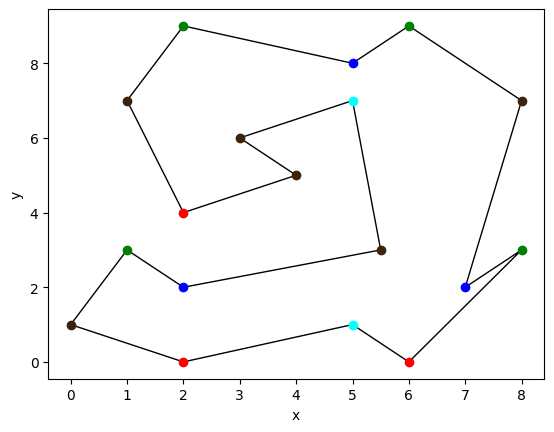

In [785]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [786]:
def direction(a,b,c):
    # <0 => prawo, >0 => lewo, =0 => współliniowe
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1]

In [787]:
def assign_color(last_vertice, curr_vertice, next_vertice ):

    if last_vertice[1] < curr_vertice[1] and next_vertice[1] < curr_vertice[1]: # obaj sąsiedzi poniżej

        if direction(last_vertice, curr_vertice, next_vertice) > 0: # kąt < pi
            return 0
        else: # kąt > pi
            return 3

    elif last_vertice[1] > curr_vertice[1] and next_vertice[1] > curr_vertice[1]: #obaj sąsiedzi powyżej

        if direction(last_vertice, curr_vertice, next_vertice) > 0: # kąt < pi
            return 1
        else:
            return 2
    
    return 4


            

In [788]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    result = [] 

    for i in range(n - 1):
        result.append(assign_color(polygon[i-1], polygon[i], polygon[i + 1]))
    
    result.append(assign_color(polygon[n - 2], polygon[n-1], polygon[0])) #ostatni wierzchołek
    return result

Przeprowadź test poprawności powyższej funkcji. 

In [789]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

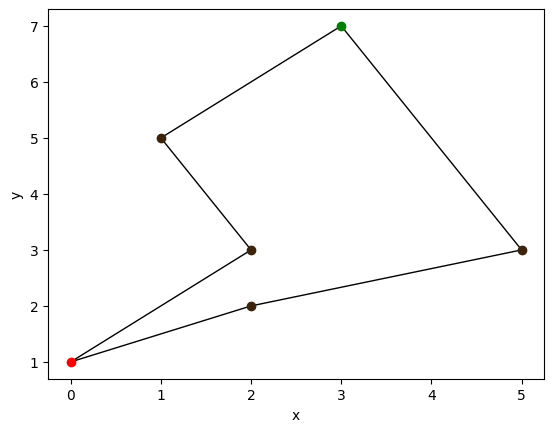

In [790]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

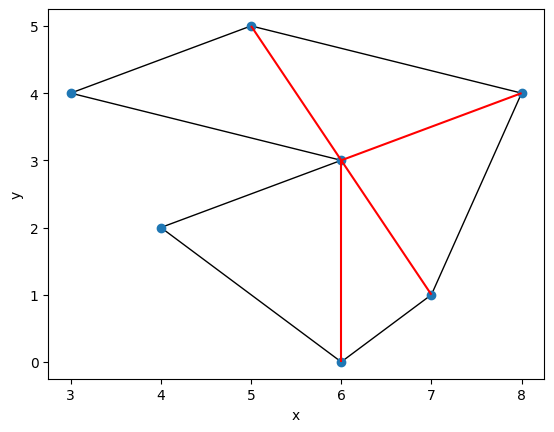

In [791]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [792]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    n=len(polygon)
    min_i = min(range(n), key=lambda i: (polygon[i][1], polygon[i][0]))
    max_i = max(range(n), key=lambda i: (polygon[i][1], polygon[i][0]))

    left_chain = make_left_chain(min_i, max_i, polygon)
    right_chain = make_right_chain(min_i, max_i, polygon)

    left_chain.pop(0)
    #right_chain.pop()
    #left_chain.pop()
    sorted_polygon = [] # (x,y,original index, boolean isInLeftChain)



    while(len(left_chain) != 0 and len(right_chain) != 0):
        
        if left_chain[0][1] < right_chain[0][1]:
            sorted_polygon.append((left_chain[0][0], left_chain[0][1], left_chain[0][2], True))
            left_chain.pop(0)
        else:
            sorted_polygon.append((right_chain[0][0], right_chain[0][1], right_chain[0][2], False))
            right_chain.pop(0)

    if(len(left_chain) > 0):
        while(len(left_chain) > 0):
            sorted_polygon.append((left_chain[0][0], left_chain[0][1], left_chain[0][2], True))
            left_chain.pop(0)
    else:
        while(len(right_chain) > 0):
            sorted_polygon.append((right_chain[0][0], right_chain[0][1], right_chain[0][2], False))
            right_chain.pop(0)

    stack = deque()

    stack.append(sorted_polygon[0])
    stack.append(sorted_polygon[1])


    result = []
    i = 2
    while(i < len(sorted_polygon)):
        a = sorted_polygon[i]
        if stack[-1][3] != a[3]:
            while(len(stack) > 0):
                b = stack.pop()
                result.append((a[2],b[2]))
            stack.append(sorted_polygon[i - 1])
            stack.append(a)
        else:
            while len(stack) > 1:
                last = stack.pop()
                if direction(stack[-1], last, a) > 0 and not a[3] or direction(stack[-1], last, a) < 0 and  a[3]:
                    result.append((a[2], stack[-1][2]))
                    last = stack.pop()
                else:
                    break
        
            stack.append(last)
            stack.append(a)
        i+=1

    j = 0
    while(j < len(result)):
        if abs(result[j][0] - result[j][1]) == 1 or abs(result[j][0] - result[j][1]) == n - 1:
            result.pop(j)
        else:
            j += 1


    return result


    

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [793]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: WRONG ANSWER
		Output:   [(4, 0), (3, 0), (2, 0), (1, 1)]
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: WRONG ANSWER
		Output:   [(3, 5), (6, 3), (2, 6), (7, 2), (1, 7), (0, 0)]
		Expected: [[1, 7], [2, 7], [2, 6], [3, 6], [3, 5]]
	Test 3: WRONG ANSWER
		Output:   [(8, 10), (7, 10), (11, 7), (6, 11), (12, 6), (5, 12), (13, 5), (4, 13), (14, 4), (3, 14), (15, 3), (2, 15), (16, 2), (1, 16), (17, 1), (0, 0)]
		Expected: [[1, 17], [16, 1], [16, 2], [2, 15], [3, 15], [3, 14], [4, 14], [13, 4], [5, 13], [12, 5], [6, 12], [11, 6], [7, 11], [8, 11], [10, 8]]
	Test 4: WRONG ANSWER
		Output:   [(0, 8), (7, 0), (1, 7), (2, 7), (6, 2), (3, 6), (4, 6), (5, 5)]
		Expected: [[3, 5], [3, 6], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0]]
	Test 5: WRONG ANSWER
		Output:   [(4, 2), (1, 4), (5, 1), (0, 0)]
		Expected: [[1, 5], [4, 1], [2, 4]]
	Test 6: WRONG ANSWER
		Output:   [(1, 8), (3, 1), (5, 3), (5, 8), (7, 5), (7, 7), (7, 5)]
		Expected: [[5, 7], [3, 5], [3, 7], [1, 3], [1, 7], [8,

Zwizualizuj powstały wielokąt podzielony na trójkąty.

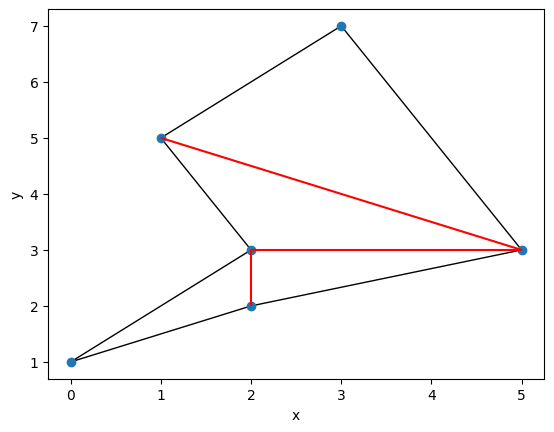

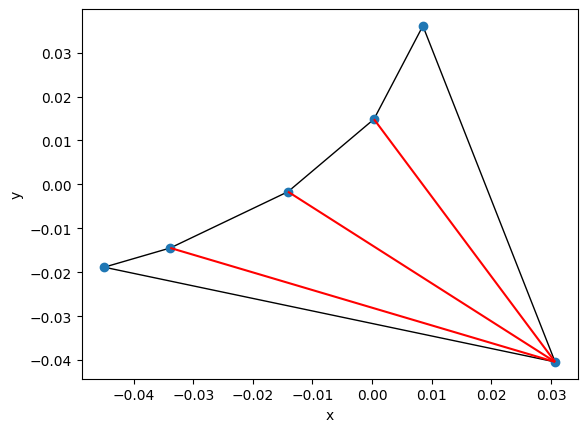

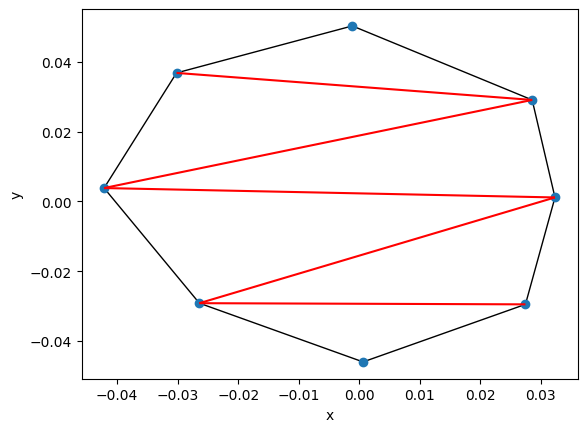

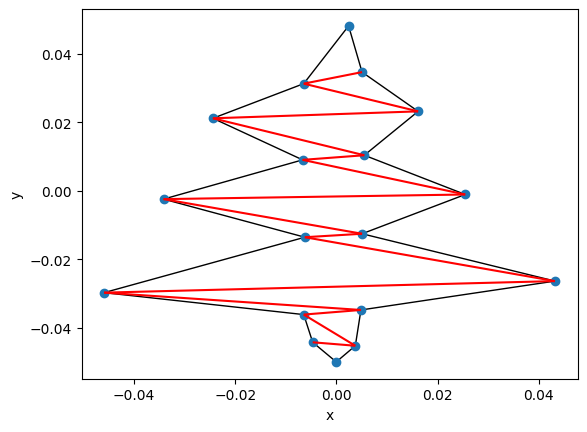

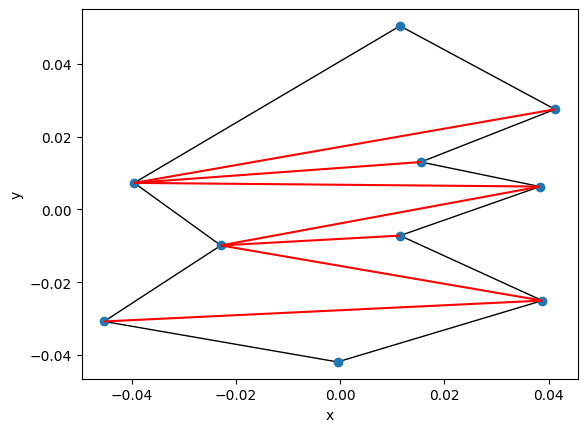

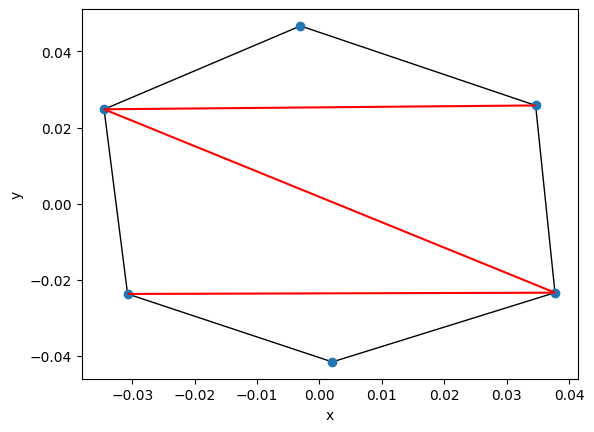

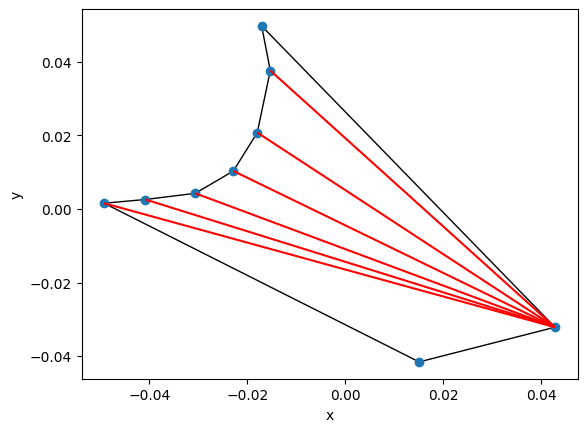

In [794]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])



pol_test = [
    (0.030693547033494514, -0.0404187105216232),
    (0.008516127678655797, 0.0360825149685729),
    (0.0003104825173654846, 0.014850897321514067),
    (-0.01410484006327968, -0.0016625830706427924),
    (-0.03384274328908614, -0.01446895561966241),
    (-0.04493145296650549, -0.0188500830706428)
]

tri_test = triangulation(pol_test)
draw_polygon_tri(pol_test, [(pol_test[x], pol_test[y]) for (x, y) in tri_test])


pol_test2 = [
        (-0.0011310497406990389, 0.05034364616169651),
        (-0.03018346909553775, 0.03686325400483377),
        (-0.042159275547150654, 0.0038362932205200373),
        (-0.02641330780521517, -0.029190667563793703),
        (0.0006431438076880541, -0.046041157759872144),
        (0.027477821227042898, -0.029527677367715277),
        (0.03235685348510742, 0.001140214789147484),
        (0.028586692194784838, 0.02911202851463769)
    ]

    
tri_test2 = triangulation(pol_test2)
draw_polygon_tri(pol_test2, [(pol_test2[x], pol_test2[y]) for (x, y) in tri_test2])

pol_t3 = [(0.002417337356075161, 0.04811376394010061),
    (-0.006453630385860332, 0.03126327374402216),
    (-0.024417340063279683, 0.021152979626375107),
    (-0.006675404579408711, 0.009020626685198624),
    (-0.034175404579408715, -0.0024377066481347104),
    (-0.006231856192311938, -0.013559030177546477),
    (-0.045929436837473234, -0.029735500765781776),
    (-0.006453630385860332, -0.036138687040291585),
    (-0.004679436837473225, -0.04422692233440923),
    (-2.2178772957098802e-05, -0.0499560890010759),
    (0.0037479825173654807, -0.04523795174617394),
    (0.004856853485107421, -0.03479064782460531),
    (0.04322378896897838, -0.026365402726566088),
    (0.0050786276786558004, -0.012548000765781775),
    (0.02548185348510741, -0.0010896674324484407),
    (0.005522176065752574, 0.010368665900884907),
    (0.01616733735607516, 0.02317503844990451),
    (0.0050786276786558004, 0.034633371783237846),]


tri3 = triangulation(pol_t3)
draw_polygon_tri(pol_t3, [(pol_t3[x], pol_t3[y]) for (x,y) in tri3])

pol_test4 = [
    (0.03877999059615596, -0.025073528383292402),
    (0.011501764789704341, -0.007212008775449252),
    (0.038336442209059185, 0.0062683833814135),
    (0.015493700273575314, 0.013008579459844863),
    (0.04121950672518822, 0.027500001028472332),
    (0.011501764789704341, 0.050416667695139),
    (-0.039506299726424686, 0.007279412793178203),
    (-0.022873235210295655, -0.009908087206821806),
    (-0.04527242875868275, -0.03080269504995907),
    (-0.00047404166190855024, -0.041924018579370836)
]

tri_test4 = triangulation(pol_test4)
draw_polygon_tri(pol_test4, [(pol_test4[x], pol_test4[y]) for (x, y) in tri_test4])


pol_test5 = [
    (-0.003046627044677744, 0.04670955985200173),
    (-0.034538562528548714, 0.02480392259709978),
    (-0.030768401238226127, -0.023725489167606126),
    (0.0020541794069351693, -0.04158700877544927),
    (0.03775982456822549, -0.02338847936368456),
    (0.034654985858548065, 0.02581495200886448)
]

tri_test5 = triangulation(pol_test5)
draw_polygon_tri(pol_test5, [(pol_test5[x], pol_test5[y]) for (x, y) in tri_test5])

polygon_test10 = [(0.04277192608002693, -0.032150734265645346),
(-0.01710710617803759, 0.049742648087295865),
(-0.015332912629650496, 0.03761029514611938),
(-0.017994202952231135, 0.020759804950040955),
(-0.022873235210295655, 0.010312501028472323),
(-0.0306353319844892, 0.004246324557884082),
(-0.04083694488771501, 0.002561275538276231),
(-0.04926436424255372, 0.0015502461265115286),
(0.015050151886478541, -0.04158700877544927),]


tri10 = triangulation(polygon_test10)
draw_polygon_tri(polygon_test10, [(polygon_test10[x], polygon_test10[y]) for (x,y) in tri10])
